<a href="https://colab.research.google.com/github/uzair011/ML---learning.../blob/main/seolBikes_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The** dataset contains count of public bikes rented at each hour in Seoul Bike haring System with the corresponding Weather data and Holidays information


###Dataset: 
https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand#

Source: Data Source :http://data.seoul.go.kr/
SOUTH KOREA PUBLIC HOLIDAYS. URL: publicholidays.go.kr



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression


In [2]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv", encoding="latin-1'").drop(["Date", "Seasons", "Holiday"], axis=1)

In [3]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [4]:
df.columns = dataset_cols  
df["functional"] = (df["functional"] == "Yes").astype(int) 
df = df[df["hour"] == 12]  
df = df.drop(["hour"], axis=1) 

In [5]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


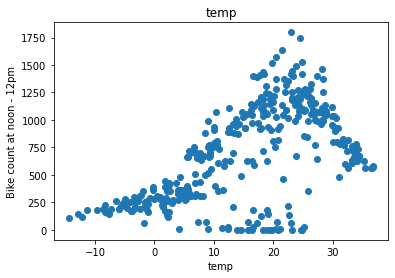

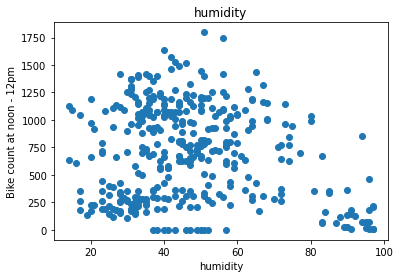

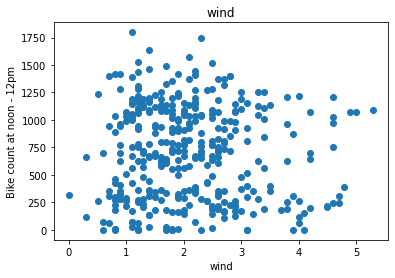

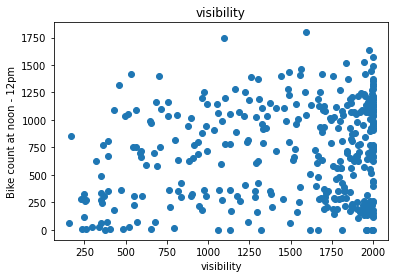

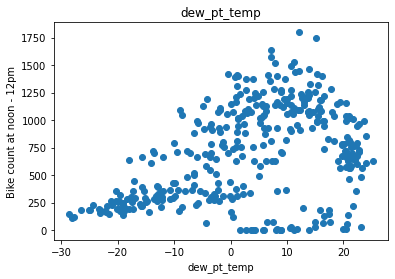

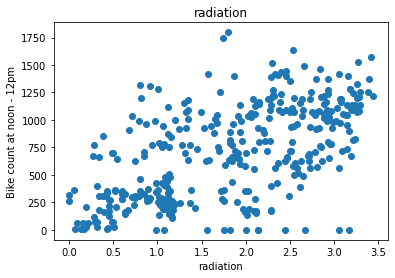

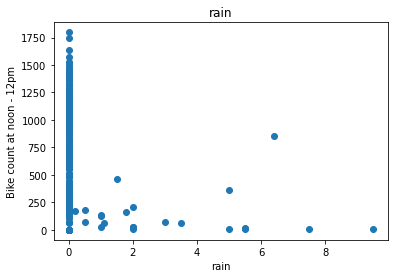

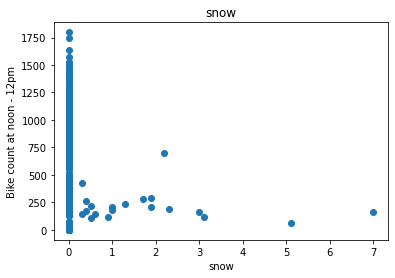

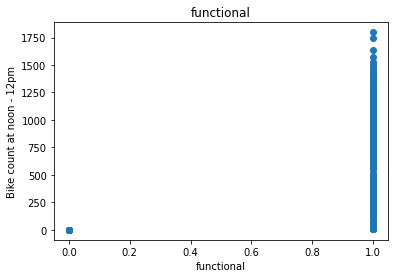

In [8]:
for label in df.columns[1:]:
   plt.scatter(df[label], df["bike_count"])
   plt.title(label)
   plt.xlabel(label)
   plt.ylabel("Bike count at noon - 12pm")
   plt.show()


In [11]:
df = df.drop(["wind", "visibility", "functional"], axis=1)

In [13]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# **TRAIN/ TEST/ VALIDATION**

In [16]:
train, validation, test = np.split(df.sample(frac=1), [ int(0.6 * len(df)), int(0.8 * len(df)) ] ) 

In [19]:
def getXY_value(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)

  if not x_labels:
    x = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_labels) == 1:
      x = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      x = dataframe[x_labels].values
 
  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((x, y))

  return data, x, y


In [28]:
_, x_train_temp, y_train_temp = getXY_value(train, "bike_count", x_labels=["temp"]) 
_, x_validation_temp, y_validation_temp = getXY_value(validation, "bike_count", x_labels=["temp"]) 
_, x_test_temp, y_test_temp = getXY_value(test, "bike_count", x_labels=["temp"]) 

In [29]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp, y_train_temp)

LinearRegression()

In [31]:
# print(temp_reg.coef_, temp_reg.intercept_)

temp_reg.score(x_test_temp, y_test_temp)

0.43779730465365774

In [ ]:
plt.scatter()